## Language Processing Project

#### This Notebook presents the created simple Application and summarises its algorithmic steps.

#### Parameters are given as an input to the Application.
#### Given document paths and their focussed page intervals (excluding cover pages, content parts, terms and conditions, legal warnings, drawing pages etc.) can be retrieved easily from a local database storing the scope of technical specifications.
#### The variable, phrase is the input coming from the human user as a typing action such as interaction with a chatbot.

In [1]:
document = "_inputs/S3 Tool Changer.pdf"
page_start = 5
page_end = 14
phrase = 'tooling adaptor'

#### Document processing is performed as plain text and tables extraction separately.

In [2]:
%run _functions_rev2.ipynb
document_components = document_processing(document, page_start, page_end)
print(document_components.keys())
list(document_components.values())[1]

dict_keys(['text', 'tables'])


[[{'table': [[None, 'Cleanroom', 'Non-Cleanroom'],
    ['Metal to Metal Parts',
     'Apiezon L or Equivalent',
     'White lithium Grease'],
    ['O-Rings', 'Apiezon L or Equivalent', 'Parker Lube-A-Cyl Lubricant']],
   'doctop': 183.64499999999995}],
 [{'table': [['Specifications', 'Robot Adaptor', 'Tool Adaptor'],
    ['', '', ''],
    ['Model Code', 'S3R-21.05-PG', 'S3T-21.05-PG'],
    ['', '', ''],
    ['Payload', '350 kg', None],
    ['', '', None],
    ['Moment Mx, My', '15000in/lbs, 1695 Nm', None],
    ['', '', None],
    ['Moment Mz', '15750 in/lbs, 1780 Nm', None],
    ['', '', None],
    ['Height', '107mm', '60mm'],
    ['Weight', '16.5 lbs, 7.34 kg', '11.2 lbs, 5.13 kg'],
    ['Couple/Uncouple', '“ BSPP', '“ BSPP'],
    ['Port', '', ''],
    ['Repeatability X,Y', '0.04 mm', None],
    ['', '', None],
    ['Repeatability Z', '0.04 mm', None],
    ['', '', None],
    ['Operating Temp.', '5 60 Deg C', None],
    ['', '', None],
    ['Operating', '6 bar + 1 (87 + 15 psi)', Non

#### Extracted text is handled with a Natural Language Processing Python Package to extract further the sentences in interest for the given phrase.

In [3]:
text = list(document_components.values())[0]
sentencesOfInterest = sentence_catcher(text, phrase)

#### Ontology transformation is performed for each extracted sentence by means of the conceptualisation developed during the meetings.

In [4]:
formalisedStructure = ontology_transformer(sentencesOfInterest)

#### After the transformation the sentences are saved to a Local Storage/Database with their newly formalised structure.

In [5]:
fileName = 'formalisedStructure_'+ phrase_namer(phrase) +'.pkl'
print(fileName)
with open('_database/'+fileName, 'wb') as f:
    pickle.dump(formalisedStructure,f)

formalisedStructure_tooling-adaptor.pkl


#### The current version of the Application retrieves formalised structures from the database and generates digraphs.
#### Generation of the network consisting of digraphs is the initial step for obtaining functional requirements and performing data mining from the bulks of sentences and tables stored in the database.

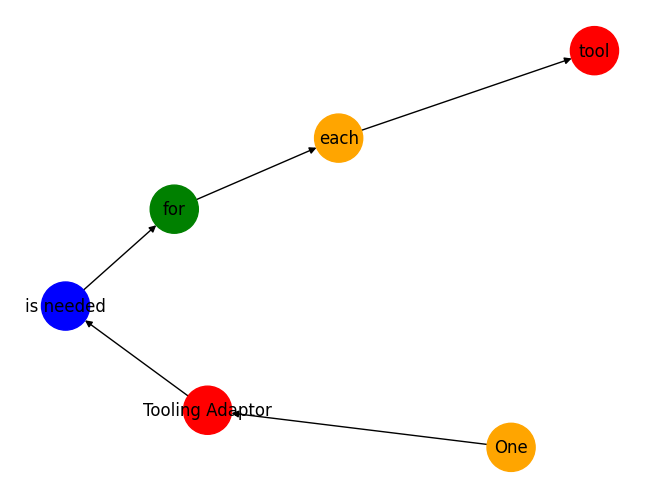

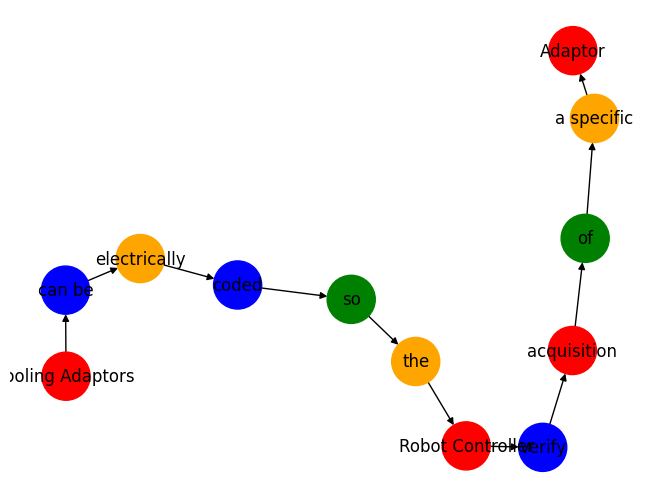

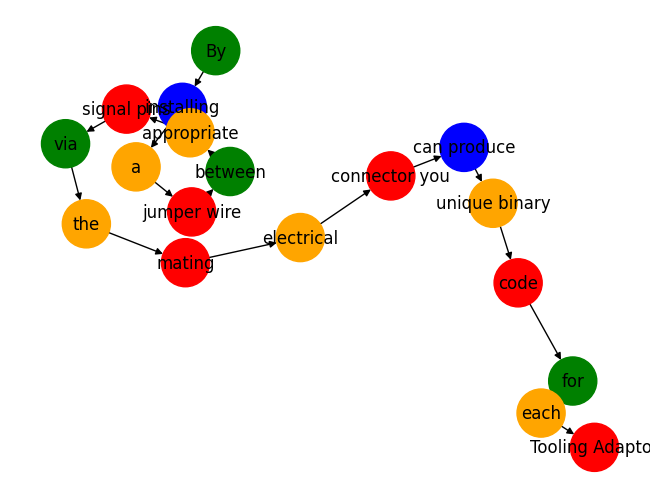

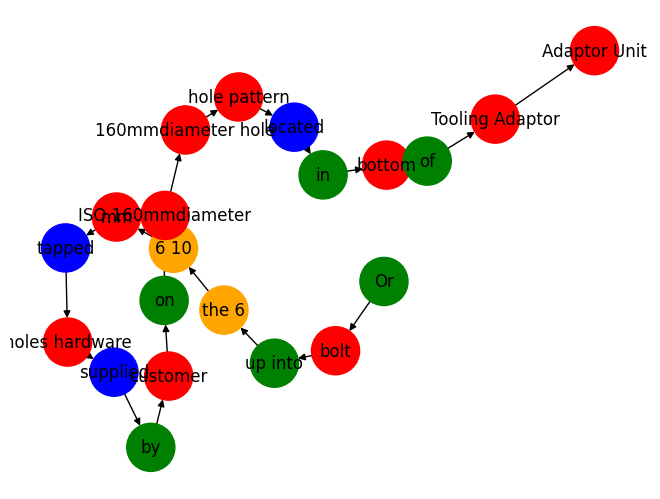

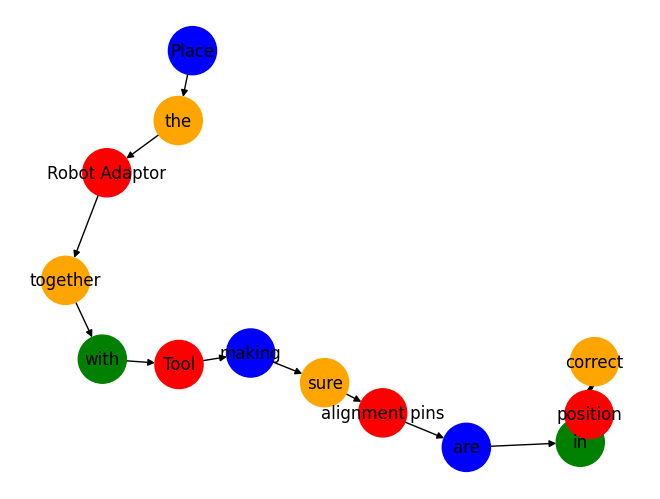

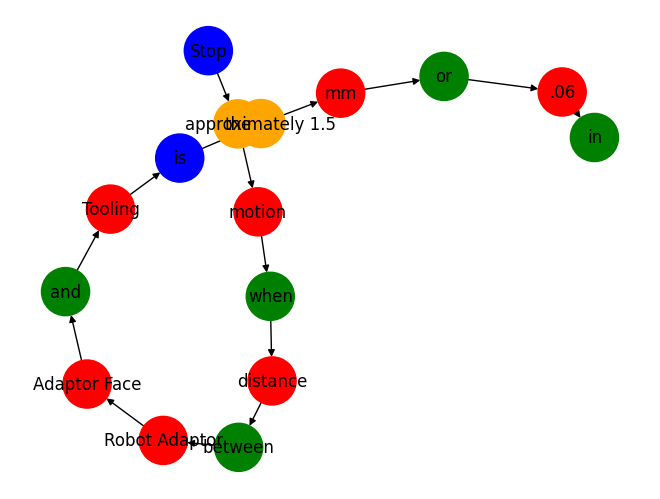

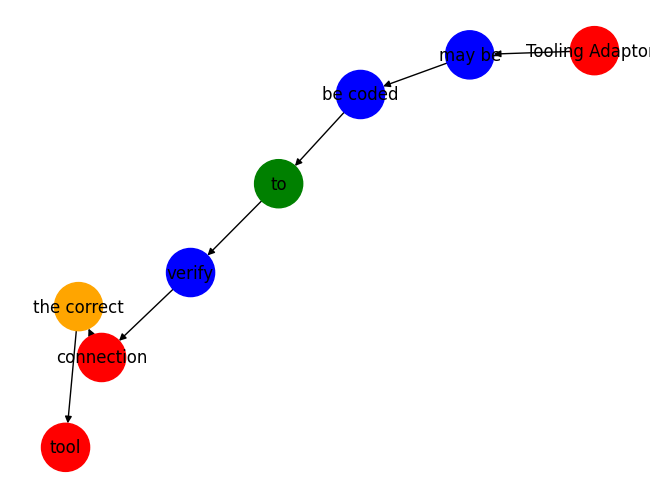

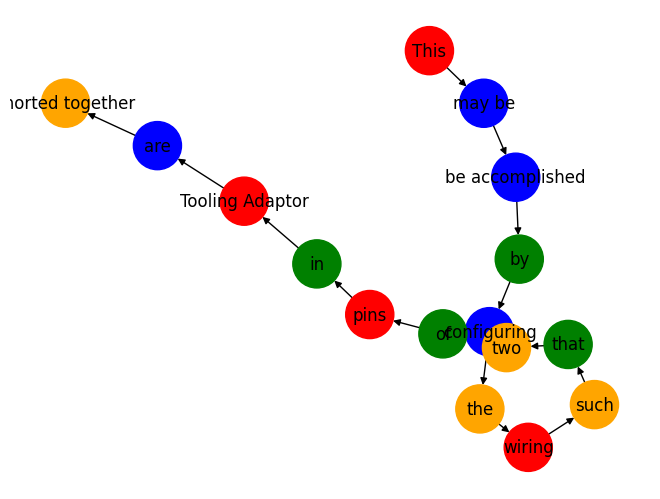

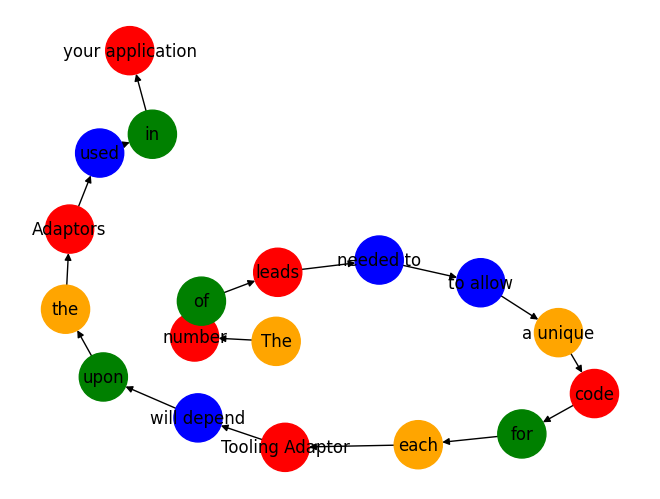

In [1]:
%run _functions_rev2_network.ipynb
fileName = 'formalisedStructure_tooling-adaptor.pkl'
with open('_database/'+fileName, 'rb') as f:
    formalisedStructure = pickle.load(f)

for sentence in formalisedStructure:
    graph(sentence)